In [1]:
import sqlite3
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with open('data/test1.csv','rb') as f:
  test1 = f.readlines()

with open('data/test2.csv','rb') as f:
  test2 = f.readlines()

with open('data/test3.db','rb') as f:
  test3 = f.readlines()

In [5]:
con = sqlite3.connect('data/test3.db')
#con.execute('select * from vacancies').fetchall()

Выгрузим БД в датафрейм

In [6]:
df = pd.read_sql('select * from vacancies', con)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1000 non-null   object
 1   название      1000 non-null   object
 2   опыт'         1000 non-null   object
 3   занятость     1000 non-null   object
 4   зп            1000 non-null   object
 5   работодатель  1000 non-null   object
 6   регион        1000 non-null   object
 7   описание      1000 non-null   object
 8   навыки        1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB
None


Создадим столбец со средним значением лет опыта

In [ ]:
exp=dict(zip(df["опыт'"].unique(),[2, 6, 4.5, 0, 0]))
df.loc[:,"опыт'"]=df["опыт'"].map(exp).values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1000 non-null   object
 1   название      1000 non-null   object
 2   опыт'         1000 non-null   object
 3   занятость     1000 non-null   object
 4   зп            1000 non-null   object
 5   работодатель  1000 non-null   object
 6   регион        1000 non-null   object
 7   описание      1000 non-null   object
 8   навыки        1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB
None


In [ ]:
df[10:20]

,id,название,опыт',занятость,зп,работодатель,регион,описание,навыки
10,77432078,Frontend-разработчик,4.5,"Полная занятость, полный день",з/п не указана,ТОО НОВА ПЕЙМЕНТ,Усть-Каменогорск,Frontend разработчик - web программист (Junior...,[]
11,77344822,ML - разработчик (Разработчик машинного обучения),6.0,"Полная занятость, удаленная работа",от 7 000 до 10 000 USD до вычета налогов,Wayy,США,We are looking for Machine Learning developers...,"['English', 'Анализ данных', 'machine learning..."
12,77373213,Младший Бэкэнд разработчик (Junior Backend Dev...,0.0,"Полная занятость, полный день",до 130 000 руб. до вычета налогов,Геограком,,Обязанности: программирование на Go и/или C++...,"['PostgreSQL', 'C++', 'Алгоритмы и структуры д..."
13,77524072,Junior+ Backend Разработчик,2.0,"Полная занятость, удаленная работа",от 100 000 руб. на руки,Вспорте,,О компании Vsporte — один из лидеров на рынке ...,"['Git', 'ООП', 'C#', 'Backend', 'Алгоритмы', '..."
14,72567973,Программист-разработчик игр (Junior),0.0,"Полная занятость, гибкий график",от 1 000 до 2 000 USD на руки,ООО ГравиЛинк,,Мы расширяем свою gamedev-команду и ищем заинт...,"['Информационные технологии', 'Разработка комп..."
15,77070727,Стажер-разработчик программного обеспечения,0.0,"Стажировка, полный день",от 41 000 руб. на руки,ООО Сибирские интеграционные системы,,Привет! Для начала мы хотим рассказать несколь...,"['SQL', 'Java', 'Английский язык', 'ООП', 'Баз..."
16,77650733,Python разработчик,6.0,"Полная занятость, удаленная работа",от 100 000 до 200 000 руб. до вычета налогов,ООО АТРАКС ТРЕЙД,,Приглашаем в команду Python разработчика на фу...,"['Python', 'Django Framework', 'PostgreSQL', '..."
17,77471199,Go разработчик,4.5,"Полная занятость, удаленная работа",до 400 000 руб. на руки,WeMakeTeam,Москва,Мы аккредитованная IT компания WeMakeTeam и ищ...,"['Go', 'Golang', 'Microservices', 'Kafka', 'My..."
18,76661659,Backend программист (SPRING),6.0,"Полная занятость, удаленная работа",от 2 500 до 5 500 EUR до вычета налогов,Analytics Company,,"Полная занятость, удаленная работа Наш коллект...","['Spring Framework', 'Java', 'JUnit', 'Git', '..."
19,77695893,Веб-разработчик (junior),2.0,"Полная занятость, полный день",от 35 000 до 55 000 руб. до вычета налогов,ООО Лаборатория Интернет,,В нашем активном и профессиональном коллективе...,"['HTML', 'CSS', 'Деловое общение', 'Грамотная ..."


Создадим столбец со средним значением зарплат в рублях

In [ ]:
def currency(curr_value, mean_val):
    rates = {'EUR': 101.28, 'USD': 91.14, 'CNY': 12.78, 'KZT': 19.79}
    return mean_val * rates.get(curr_value, 1)

def get_salary(sal):
  sal_list = []

  for s in sal:
    mean_sal = 0
    counter = 0
    numbers = re.findall(r'(\d+\s\d+)', s)
    numbers = [int(num.replace('\xa0', '')) for num in numbers]

    if numbers == []:
      sal_list.append(np.nan)
      continue

    for num in numbers:
      counter += 1
      mean_sal += num
    mean_sal /= counter

    curr = re.findall(r'USD|KZT|EUR|CNY', s)
    if curr != []:
      mean_sal = currency(curr[0], mean_sal)

    tax = re.findall(r'gross|на руки|до вычета', s)
    if tax != []:
      mean_sal *= 0.87
    sal_list.append(mean_sal)
  print(len(sal_list))

  return sal_list


In [ ]:
sal_list = get_salary(df['зп'])
df['sal'] = sal_list
df['sal'] = df['sal'].fillna(df['sal'].median()) #медиану соседей?

print(np.isnan(df['sal']))

1000
0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: sal, Length: 1000, dtype: bool


In [ ]:
df[['sal',"опыт'"]]

,sal,опыт'
0,261000.0,2.0
1,9469515.0,6.0
2,121800.0,2.0
3,282750.0,4.5
4,121800.0,4.5
...,...,...
995,121800.0,4.5
996,121800.0,4.5
997,130500.0,4.5
998,121800.0,2.0


Приведем столбец с названиями городов к виду, удобному для дальнешей раблты (уберем лишние уточнения, оставив только название города)

In [ ]:
df['city'] = df['регион'].str.split(',').str[0].str.strip()

In [ ]:
df['city'].value_counts()

,count
city,
,566
Москва,207
Санкт-Петербург,45
Екатеринбург,16
Алматы,15
...,...
Нижний Тагил,1
Гомель,1
Новочеркасск,1


Оставим только те регионы, которые имеют больше 5 вакансий


In [ ]:
region_counts = df['регион'].value_counts()
regions_to_keep = region_counts[region_counts > 5].index
print(regions_to_keep)
filtered_df = df[df['регион'].isin(regions_to_keep)]

Index(['', 'Москва', 'Санкт-Петербург', 'Екатеринбург', 'Алматы',
       'Новосибирск', 'Астана', 'Казань', 'Нижний Новгород', 'Томск'],
      dtype='object', name='регион')


Построим ящик с усами по зп в разрезе региона


In [ ]:
def boxplot_city(city_name, df):
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[df['регион'] == city_name]['sal'])
  plt.title(f'Ящик с усами в разрезе зп в городе {city_name}')
  plt.xlabel('City')
  plt.ylabel('Salary')

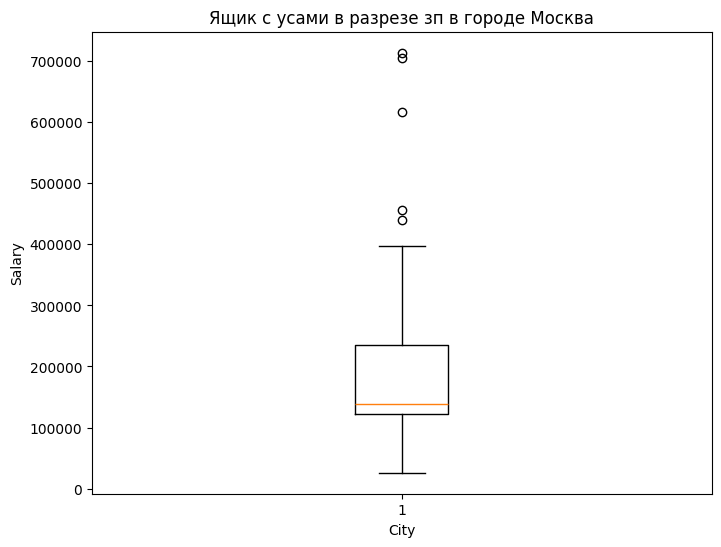

In [ ]:
boxplot_city("Москва", df)

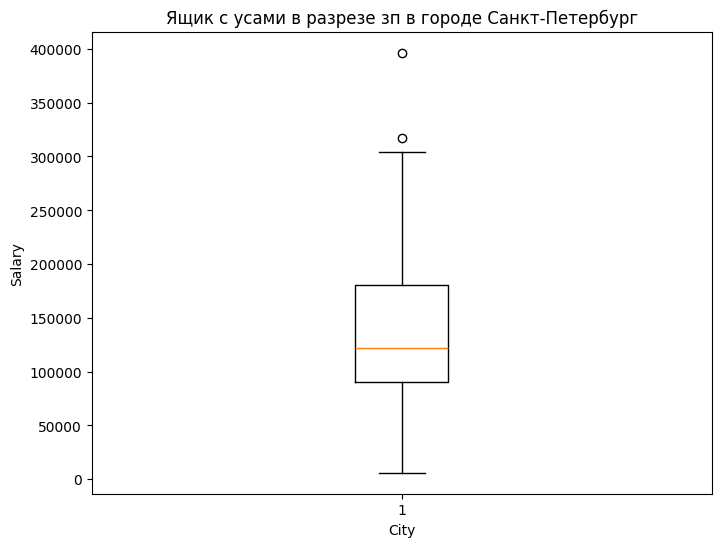

In [ ]:
boxplot_city("Санкт-Петербург", df)

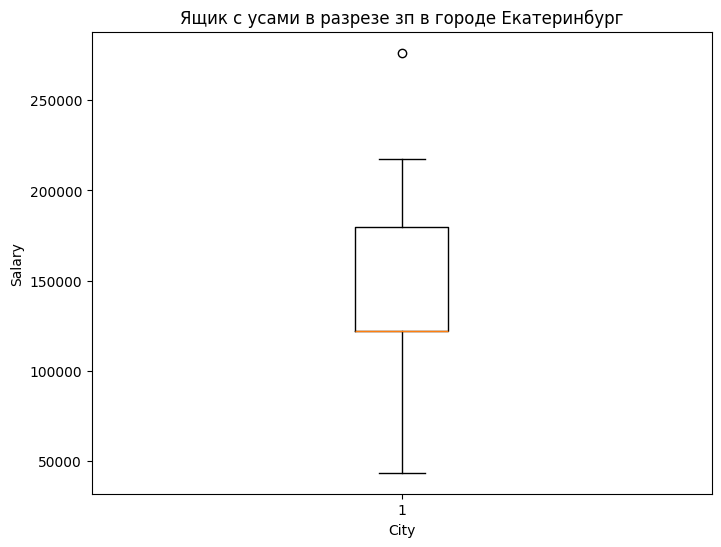

In [ ]:
boxplot_city("Екатеринбург", df)

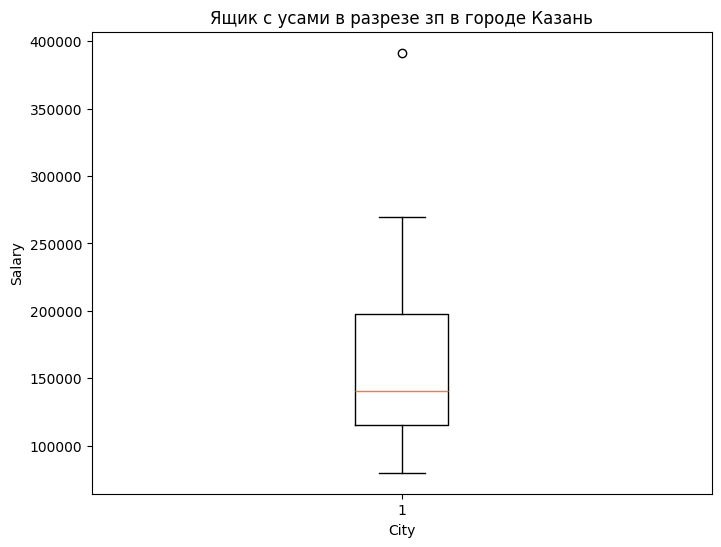

In [ ]:
boxplot_city("Казань", df)

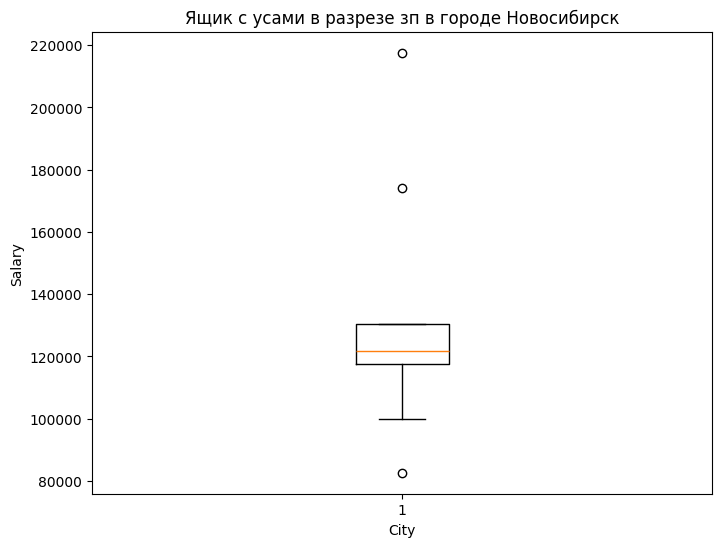

In [ ]:
boxplot_city("Новосибирск", df)

In [ ]:
skills_divided = df.explode('навыки')
print(skills_divided['навыки'])
print(skills_divided['навыки'].unique())

0      ['Работа в команде', 'Информационная безопасно...
1      ['Laravel', 'HTML/CSS', 'Bitrix', 'Wordpress',...
2      ['JavaScript', 'ASP.NET', 'AngularJS', 'C#', '...
3                  ['Git', 'MySQL', 'PHP', 'ООП', 'Yii']
4                                                     []
                             ...                        
995              ['PHP', 'MySQL', 'Git', 'Linux', 'SQL']
996                 ['Linux Kernel Space', 'C', 'Linux']
997    ['PostgreSQL', 'SQL', 'MS SQL', 'Английский\xa...
998    ['Zerocoding', 'No-Code', 'Зерокодер', 'Разраб...
999    ['yii2', 'MySQL', 'jQuery', 'API', 'web-разраб...
Name: навыки, Length: 1000, dtype: object
["['Работа в команде', 'Информационная безопасность', 'Базы данных', 'Безопасность', 'Опытный пользователь ПК', 'Соблюдение сроков', 'Внедрение систем информационной безопасности', 'Внешний аудит информационных систем', 'Внутренний аудит информационных систем', 'Выявление каналов утечки информации', 'Информационные технологии']"


In [ ]:
def boxplot_skill(skill_name, df):
  plt.figure(figsize=(8, 6))

  df_skill = df[df['навыки'].apply(lambda x: skill_name.lower() in x.lower())]
  plt.boxplot(df_skill['sal'])
  plt.title(f'Ящик с усами для навыка {skill_name}')
  plt.xlabel('skill')
  plt.ylabel('salary')

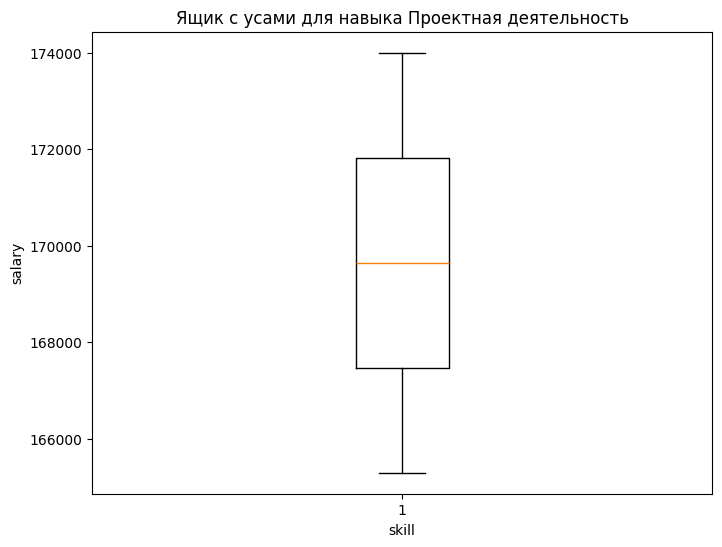

In [ ]:
boxplot_skill("Проектная деятельность", df)

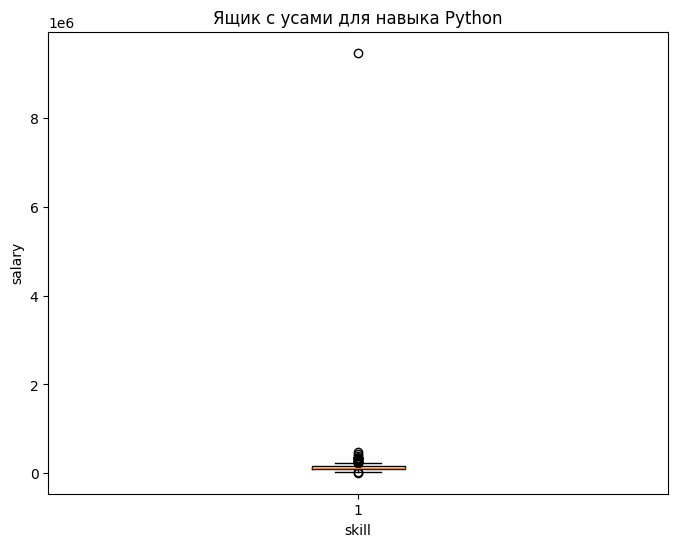

In [ ]:
boxplot_skill("Python", df)

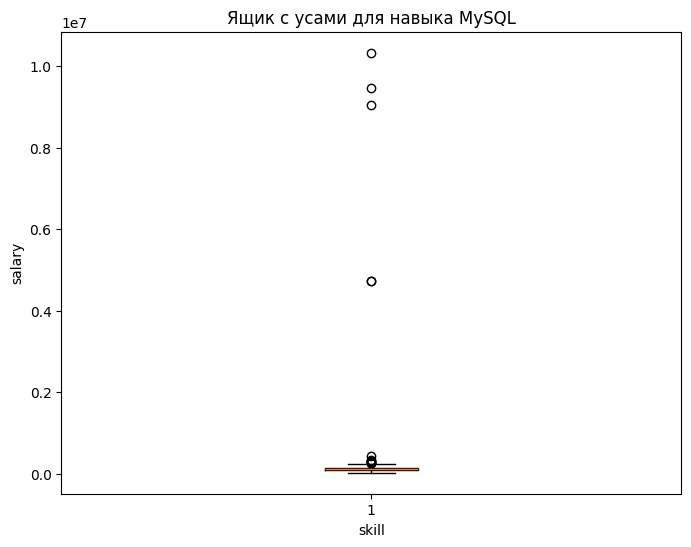

In [ ]:
boxplot_skill("MySQL", df)

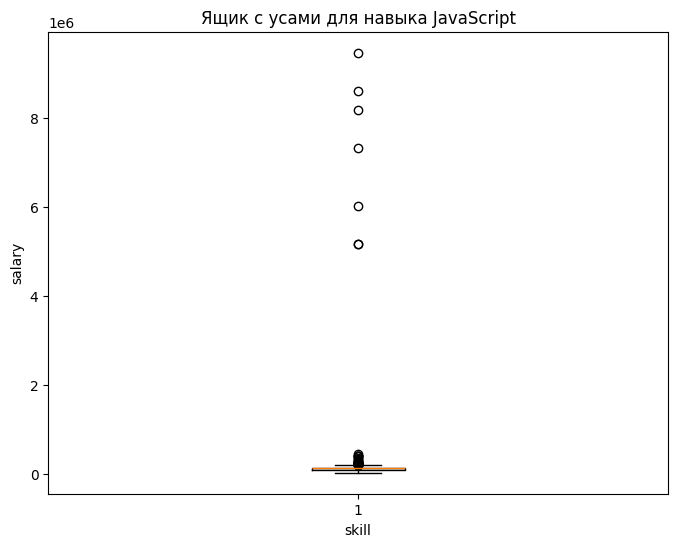

In [ ]:
boxplot_skill("JavaScript", df)

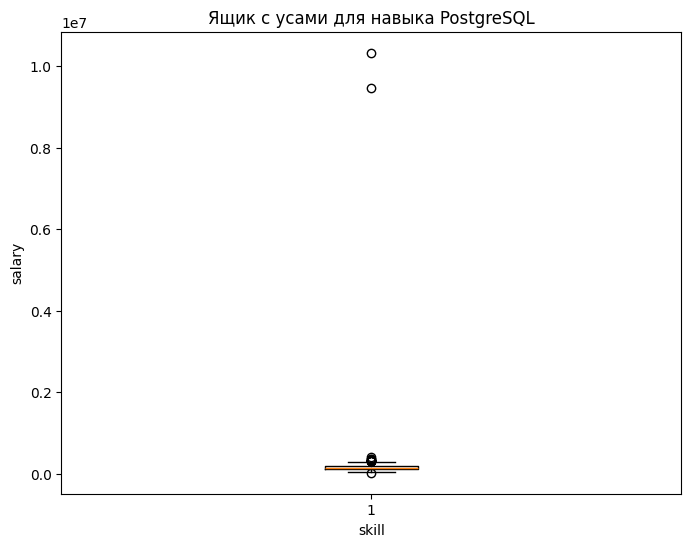

In [ ]:
boxplot_skill("PostgreSQL", df)

In [ ]:
from scipy import stats

In [ ]:
def pval_result(p_val, alpha=0.05):
  print(f'p value = {p_val}')
  if p_val < alpha:
    print('Есть статистически значимые различия между группами')
  if p_val > alpha:
    print('Нет статистически значимых различий между группами')

Выясним, есть ли зависимость значения зп от количества лет опыта


In [ ]:
sal_from_exp = stats.f_oneway(
  df[df["опыт'"] == 0]['sal'],
  df[df["опыт'"] == 2]['sal'],
  df[df["опыт'"] == 4.5]['sal'],
  df[df["опыт'"] == 6]['sal']
)

print(pval_result(sal_from_exp[1]))

p value = 0.019979160064387318
Есть статистически значимые различия между группами
None


Есть статистически значимые различия между группами => зп зависит от опыта

In [ ]:
df['занятость'].value_counts() #?

,count
занятость,
"Полная занятость, полный день",596
"Полная занятость, удаленная работа",282
"Полная занятость, гибкий график",48
"Частичная занятость, удаленная работа",23
"Стажировка, полный день",15
"Стажировка, гибкий график",15
"Частичная занятость, полный день",7
"Проектная работа/разовое задание, удаленная работа",5
"Проектная работа/разовое задание, полный день",4


Выделим две группы в данных: seniors и others

In [ ]:
def get_names(title):
  title_lower = title.lower()
  if 'ведущ' in title_lower or 'старш' in title_lower or 'senior' in title_lower or 'сен' in title_lower:
      return 'seniors'
  else:
      return 'others'

df['новое название'] = df['название'].map(get_names)

Зависит ли зп от этих групп?

In [ ]:
sal_from_name = stats.f_oneway(
  df[df["новое название"] == 'seniors']['sal'],
  df[df["новое название"] == 'others']['sal']
)

pval_result(sal_from_name[1])

p value = 0.44362704557233357
Нет статистически значимых различий между группами


Нет статистически значимых различий между группами => нет зависимости между зп и группами others и seniors

In [ ]:
np.random.seed(42)

Создадим датафрейм из 1 млн строк

In [ ]:
num_rows = 1000000
gender = np.random.choice(['Male', 'Female'], size=num_rows)
age = np.random.randint(18, 65, size=num_rows)
income = np.random.normal(loc=50000, scale=15000, size=num_rows).astype(int)
profession = np.random.choice(['Analyst', 'SRE', 'Product Manager', 'Developer'], size=num_rows)

Создадим датафрейм с сгенерированными данными

In [ ]:
df_measure = pd.DataFrame({
  'gender': gender,
  'age': age,
  'income': income,
  'profession': profession
})

Замерим объем памяти датафрейма в памяти

In [ ]:
df_measure.info()

memory_usage = df_measure.memory_usage(deep=True)
print("\nПамять по столбцам:")
print(memory_usage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   gender      1000000 non-null  object
 1   age         1000000 non-null  int64 
 2   income      1000000 non-null  int64 
 3   profession  1000000 non-null  object
dtypes: int64(2), object(2)
memory usage: 30.5+ MB

Память по столбцам:
Index              128
gender        61999622
age            8000000
income         8000000
profession    65494858
dtype: int64


Замерим скорость записи и чтения

In [ ]:
%%timeit
df_measure.to_csv('data.csv', index=False)

1.55 s ± 422 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
df_new = pd.read_csv('data.csv')

496 ms ± 92.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
avg_age = df_measure['age'].mean()
max_income = df_measure['income'].max()
most_common_gender = df_measure['gender'].mode()[0]
rarest_profession = df_measure['profession'].value_counts().idxmin()

257 ms ± 72.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
